In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, JetHT_Data_UL
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import Hist, Hist2d, easy_bins
from utils.useCMSstyle import *
from utils.cutConfig import jet_btagWP

tight_b = jet_btagWP[1]
medium_b = jet_btagWP[2]
loose_b = jet_btagWP[3]

In [11]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.limits'] = (-2,2)

In [3]:
mH_bins = easy_bins['mH']
score_bins = easy_bins['score']

In [4]:
import awkward as ak
import numpy as np
import uproot

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import matplotlib.patches as patches

In [6]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [7]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
data_tree = Tree(JetHT_Data_UL)

In [8]:
n_t6_NN6j_0pt8 = signal_tree.nfound_t6[signal_tree.b_6j_score > 0.8]
n_h_t6_NN6j_0pt8 = signal_tree.nfound_t6_h[signal_tree.b_6j_score > 0.8]

Text(1.0, 1.0, 'Jet-Ordering Method\n$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

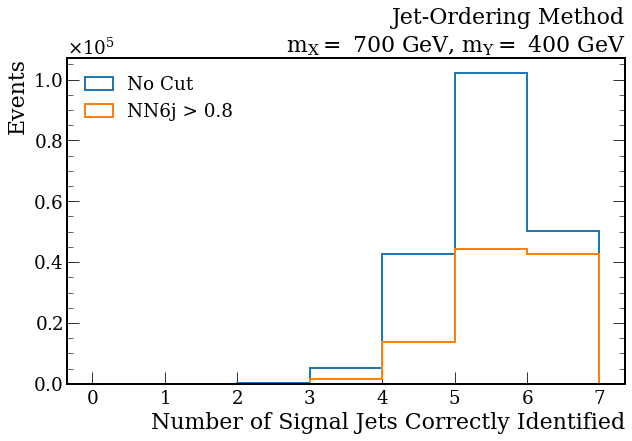

In [17]:
fig, ax, n, edges = Hist(signal_tree.nfound_t6, bins=np.arange(8), label='No Cut')
fig, ax, n, edges = Hist(n_t6_NN6j_0pt8, bins=np.arange(8), label='NN6j > 0.8', fig=fig, ax=ax)
ax.legend(loc=2)
ax.set_ylabel('Events')
ax.set_xlabel('Number of Signal Jets Correctly Identified')
ax.set_title("Jet-Ordering Method\n" + signal_tree.sample, loc='right')

In [64]:
n_bins = np.arange(8)

Text(0, 1, 'b Jets Identified by NN')

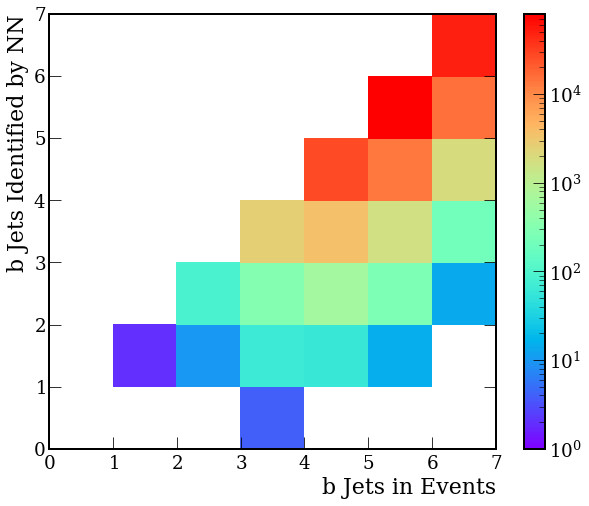

In [80]:
fig, ax = plt.subplots(figsize=(10,8))

n, xe, ye, im = Hist2d(ax=ax, x=signal_tree.nfound_presel, y=signal_tree.nfound_nn, bins=(n_bins, n_bins))
fig.colorbar(im, ax=ax)
ax.minorticks_off()
ax.set_xlabel('b Jets in Events')
ax.set_ylabel('b Jets Identified by NN')

True


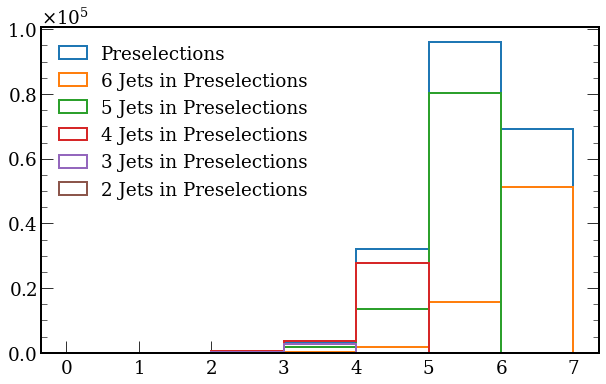

In [88]:
fig, ax, n_tot, edges = Hist(signal_tree.nfound_presel, bins=np.arange(8), label='Preselections')
fig, ax, n_6, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 6], bins=np.arange(8), label='6 Jets in Preselections', fig=fig, ax=ax)
print(n_6.sum() == n_tot[-1])
fig, ax, n_5, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 5], bins=np.arange(8), label='5 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_4, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 4], bins=np.arange(8), label='4 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_3, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 3], bins=np.arange(8), label='3 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_2, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 2], bins=np.arange(8), label='2 Jets in Preselections', fig=fig, ax=ax)
ax.legend(loc=2)

True


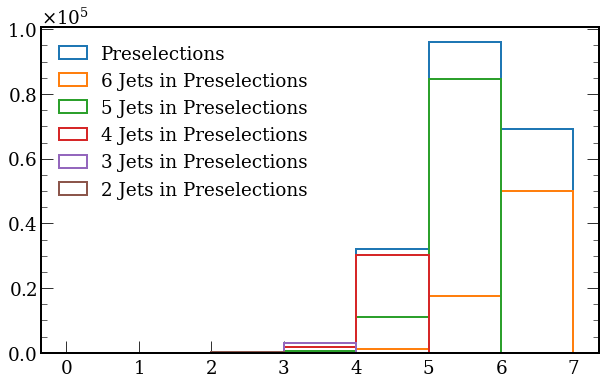

In [89]:
fig, ax, n_tot, edges = Hist(signal_tree.nfound_presel, bins=np.arange(8), label='Preselections')
fig, ax, n_6, edges = Hist(signal_tree.nfound_t6[signal_tree.nfound_presel == 6], bins=np.arange(8), label='6 Jets in Preselections', fig=fig, ax=ax)
print(n_6.sum() == n_tot[-1])
fig, ax, n_5, edges = Hist(signal_tree.nfound_t6[signal_tree.nfound_presel == 5], bins=np.arange(8), label='5 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_4, edges = Hist(signal_tree.nfound_t6[signal_tree.nfound_presel == 4], bins=np.arange(8), label='4 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_3, edges = Hist(signal_tree.nfound_t6[signal_tree.nfound_presel == 3], bins=np.arange(8), label='3 Jets in Preselections', fig=fig, ax=ax)
fig, ax, n_2, edges = Hist(signal_tree.nfound_t6[signal_tree.nfound_presel == 2], bins=np.arange(8), label='2 Jets in Preselections', fig=fig, ax=ax)
ax.legend(loc=2)

84.02599424079695


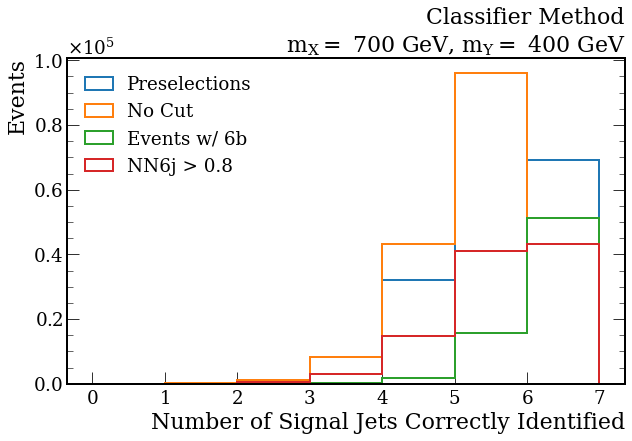

In [81]:
fig, ax, n, edges = Hist(signal_tree.nfound_presel, bins=np.arange(8), label='Preselections')
fig, ax, n_tot, edges = Hist(signal_tree.nfound_nn, bins=np.arange(8), label='No Cut', fig=fig, ax=ax)
fig, ax, n_tot, edges = Hist(signal_tree.nfound_nn[signal_tree.nfound_presel == 6], bins=np.arange(8), label='Events w/ 6b', fig=fig, ax=ax)
fig, ax, n_6jcut, edges = Hist(signal_tree.nfound_nn[signal_tree.b_6j_score > 0.8], bins=np.arange(8), label='NN6j > 0.8', fig=fig, ax=ax)
ax.legend(loc=2)
ax.set_ylabel('Events')
ax.set_xlabel('Number of Signal Jets Correctly Identified')
ax.set_title("Classifier Method\n" + signal_tree.sample, loc='right')

print(n_6jcut[-1]/n_tot[-1]*100)

86.37732749178532
0.41052533227441546


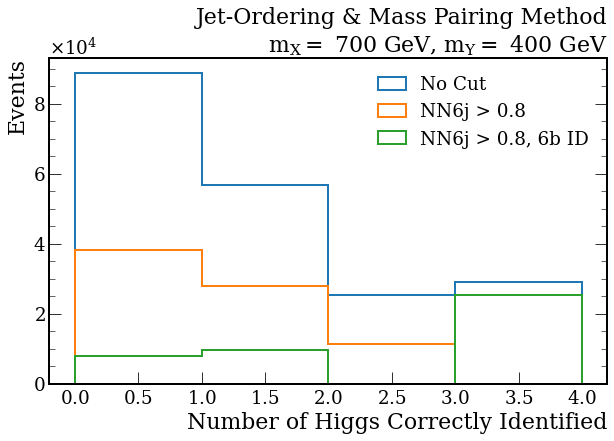

In [35]:
fig, ax, n_tot, edges = Hist(signal_tree.nfound_t6_h, bins=np.arange(5), label='No Cut')
fig, ax, n_6jcut, edges = Hist(n_h_t6_NN6j_0pt8, bins=np.arange(5), label='NN6j > 0.8', fig=fig, ax=ax)
fig, ax, n_6bID, edges = Hist(signal_tree.nfound_t6_h[(signal_tree.b_6j_score > 0.8) & (signal_tree.nfound_t6 == 6)], bins=np.arange(5), label='NN6j > 0.8, 6b ID', fig=fig, ax=ax)
ax.set_ylabel('Events')
ax.set_xlabel('Number of Higgs Correctly Identified')
ax.set_title("Jet-Ordering & Mass Pairing Method\n" + signal_tree.sample, loc='right')

print(n_6jcut[-1]/n_tot[-1]*100)
print(n_6bID[:-1].sum()/n_6bID.sum())

Text(1.0, 1.0, 'Classifier Method\n$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

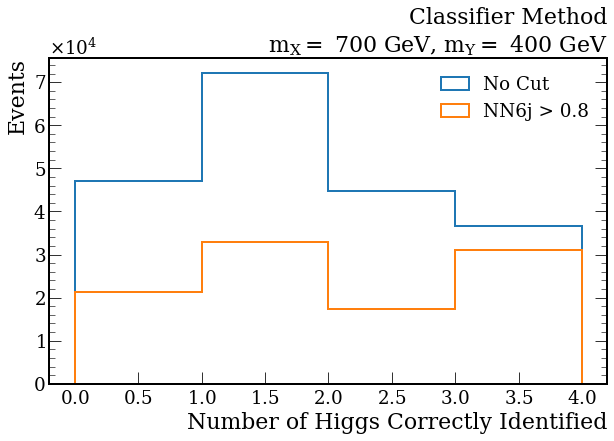

In [20]:
fig, ax, n, edges = Hist(signal_tree.nfound_nn_h, bins=np.arange(5), label='No Cut')
Hist(signal_tree.nfound_nn_h[signal_tree.b_6j_score > 0.8], bins=np.arange(5), label='NN6j > 0.8', fig=fig, ax=ax)
ax.set_ylabel('Events')
ax.set_xlabel('Number of Higgs Correctly Identified')
ax.set_title("Classifier Method\n" + signal_tree.sample, loc='right')

Text(1.0, 1.0, 'Classifier Method\n$m_X=$ 700 GeV, $m_Y=$ 400 GeV')

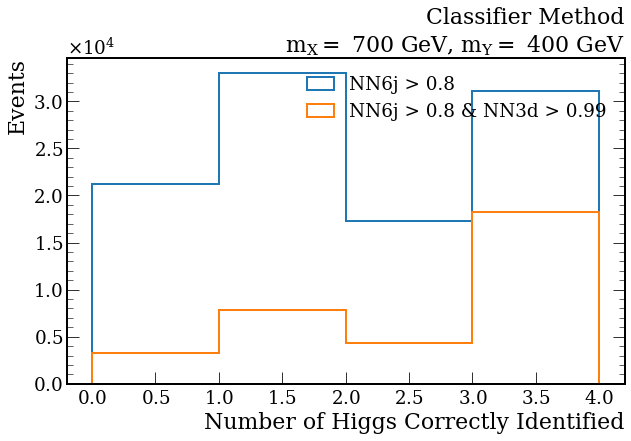

In [25]:
NN3d_cut = 0.99
fig, ax, n, edges = Hist(signal_tree.nfound_nn_h[signal_tree.b_6j_score > 0.8], bins=np.arange(5), label='NN6j > 0.8')
Hist(signal_tree.nfound_nn_h[(signal_tree.b_6j_score > 0.8) & (signal_tree.b_3d_score > NN3d_cut)], bins=np.arange(5), label=f'NN6j > 0.8 & NN3d > {NN3d_cut}', fig=fig, ax=ax)
ax.set_ylabel('Events')
ax.set_xlabel('Number of Higgs Correctly Identified')
ax.set_title("Classifier Method\n" + signal_tree.sample, loc='right')